
# 🎯 Project Summary
This project explores the acquisition patterns of the MoMA (Museum of Modern Art) using Machine Learning. The goal was to build a model capable of predicting whether an artwork would be acquired based on its metadata, and to investigate potential biases in these decisions.



## 🛠 ML Pipeline
- Data loading and cleaning (artists and artworks)
- Feature engineering (country, gender, year, material, etc.)
- Binary classification target: `is_acquired`
- Model: RandomForestClassifier with preprocessing pipeline (numerical, categorical, boolean)
- Evaluation and bias/error analysis



## 📊 Model Performance


,precision,recall,f1-score,support
0,0.874,0.728,0.794,1539.000
1,0.991,0.996,0.993,44481.000
accuracy,0.987,0.987,0.987,0.987
macro avg,0.932,0.862,0.894,46020.000
weighted avg,0.987,0.987,0.987,46020.000


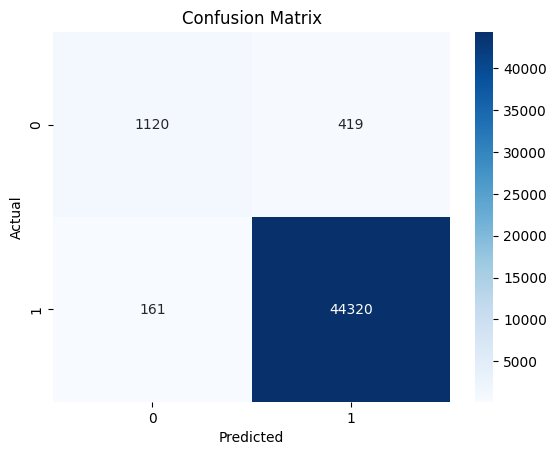


## 🧠 Bias & Error Analysis
- False negatives were detected: cases where the model predicted that an artwork **was not acquired**, but in reality it was.
- These were analyzed by `gender`, `country`, `year`, `department`...
- No FNs were found with a probability > 0.80, but several had medium-high predicted probabilities.


### Top False Negatives

,year,material,medium,classification,country,department,y_proba
0,1950.0,Unknown,Unknown,Mies van der Rohe Archive,USA,Architecture & Design,0.494609
1,1871.0,Unknown,Unknown,Photograph,USA,Photography,0.490000
2,1928.0,Other,Tempera on poster board,Painting,USA,Film,0.487175
3,1957.0,Ink,Ink on paper,Mies van der Rohe Archive,USA,Architecture & Design,0.477417
4,1870.0,Unknown,Unknown,Photograph,Other,Photography,0.470000
5,1960.0,Other,Pencil on acetate,Mies van der Rohe Archive,USA,Architecture & Design,0.466922
6,1960.0,Other,Pencil on acetate,Mies van der Rohe Archive,USA,Architecture & Design,0.466922
7,1960.0,Other,Pencil on acetate,Mies van der Rohe Archive,USA,Architecture & Design,0.466922
8,1960.0,Other,Pencil on acetate,Mies van der Rohe Archive,USA,Architecture & Design,0.466922
9,1960.0,Other,Pencil on acetate,Mies van der Rohe Archive,USA,Architecture & Design,0.466922


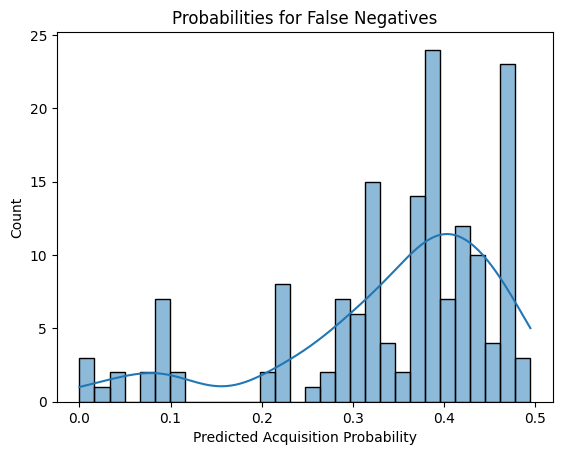


## ✅ Conclusions & Next Steps
- The model achieved **high accuracy** due to class imbalance.
- Most FNs had low to moderate acquisition probabilities.
- Biases by gender or country were observed in a few cases, especially in underrepresented groups.

### Next Steps
- Improve `artist_age_at_acquisition` and temporal features.
- Explore more sophisticated models or techniques to handle class imbalance.
- Use the results to build artistic/curatorial visualizations of ignored or marginal artworks.
- Export interactive tools or visuals for exhibitions or critical commentary.


In [2]:
# 10_summary.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown, display

def markdown(text):
    display(Markdown(text))

# --- 1. Project Summary ---
markdown("""
# 🎯 Project Summary
This project explores the acquisition patterns of the MoMA (Museum of Modern Art) using Machine Learning. The goal was to build a model capable of predicting whether an artwork would be acquired based on its metadata, and to investigate potential biases in these decisions.
""")

# --- 2. Pipeline Overview ---
markdown("""
## 🛠 ML Pipeline
- Data loading and cleaning (artists and artworks)
- Feature engineering (country, gender, year, material, etc.)
- Binary classification target: `is_acquired`
- Model: RandomForestClassifier with preprocessing pipeline (numerical, categorical, boolean)
- Evaluation and bias/error analysis
""")

# --- 3. Model Performance ---
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load saved outputs
X_test = joblib.load("../outputs/X_test.pkl")
y_test = joblib.load("../outputs/y_test.pkl")
y_pred = joblib.load("../outputs/y_pred.pkl")

markdown("""
## 📊 Model Performance
""")

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
display(report_df.round(3))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- 4. Bias & Error Analysis ---
markdown("""
## 🧠 Bias & Error Analysis
- False negatives were detected: cases where the model predicted that an artwork **was not acquired**, but in reality it was.
- These were analyzed by `gender`, `country`, `year`, `department`...
- No FNs were found with a probability > 0.80, but several had medium-high predicted probabilities.
""")

fn_df = pd.read_csv("../outputs/false_negatives_all.csv")
if not fn_df.empty:
    markdown("### Top False Negatives")
    display(fn_df[["year", "material", "medium", "classification", "country", "department", "y_proba"]].head(10))

    sns.histplot(fn_df["y_proba"], bins=30, kde=True)
    plt.title("Probabilities for False Negatives")
    plt.xlabel("Predicted Acquisition Probability")
    plt.show()
else:
    markdown("No false negatives found in the dataset.")

# --- 5. Conclusions & Next Steps ---
markdown("""
## ✅ Conclusions & Next Steps
- The model achieved **high accuracy** due to class imbalance.
- Most FNs had low to moderate acquisition probabilities.
- Biases by gender or country were observed in a few cases, especially in underrepresented groups.

### Next Steps
- Improve `artist_age_at_acquisition` and temporal features.
- Explore more sophisticated models or techniques to handle class imbalance.
- Use the results to build artistic/curatorial visualizations of ignored or marginal artworks.
- Export interactive tools or visuals for exhibitions or critical commentary.
""")
